## start

In [1]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #指定默认字体 SimHei为黑体
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [5]:
pd.__version__

'0.25.1'

# 结合金融时间序列演示Pandas模块操作1

## Pandas数据结构

In [5]:
return_array = np.array([[0.003731, 0.021066, -0.004854, 0.006098, -0.00606],
                         [-0.001838, 0.001842, -0.016544, -0.003738, 0.003752],
                         [-0.003087, -0.000344, -0.033391, 0.007123, 0.004597],
                         [-0.024112, 0.011704, -0.029563, -0.01457, 0.016129]])

In [7]:
date = ['2018-09-03','2018-09-04','2018-09-05','2018-09-06','2018-09-07']
stock_ = ['中国石油','工商银行','上汽集团','宝钢股份']
return_dataframe = pd.DataFrame(data=return_array.T,index=date,columns=stock_)

In [8]:
HS300_excel1 = pd.read_excel(r"./datas/沪深300指数（2018年）.xlsx",sheet_name="Sheet1",header=0,index_col=0)
HS300_excel1.head()

,开盘点位,最高点位,最低点位,收盘点位
日期,,,,
2018-01-02,4045.2086,4087.7789,4045.2086,4087.4012
2018-01-03,4091.4607,4140.0543,4088.7302,4111.3925
2018-01-04,4114.1213,4137.6420,4105.8858,4128.8119
2018-01-05,4133.3439,4151.2818,4123.2817,4138.7505
2018-01-08,4140.8545,4166.3182,4127.3081,4160.1595


## 数据框的可视化

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029C710A5808>,
      dtype=object)

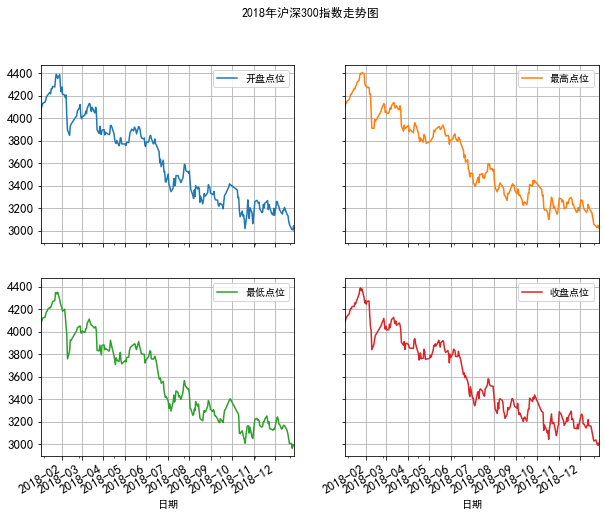

In [9]:
HS300_excel1.plot(kind='line',
                  subplots=True,
                  sharex=True,
                  sharey=True,
                  layout=(2, 2),
                  figsize=(10, 8),
                  title=u"2018年沪深300指数走势图",
                  grid=True,
                  fontsize=13)

## 数据框的内部操作

条件性截取

In [10]:
HS300_excel1[HS300_excel1["收盘点位"]>=4300]

,开盘点位,最高点位,最低点位,收盘点位
日期,,,,
2018-01-22,4276.4811,4338.4832,4275.8977,4336.5974
2018-01-23,4346.8885,4383.5722,4346.7925,4382.6129
2018-01-24,4389.4547,4397.8196,4349.0865,4389.8853
2018-01-25,4381.9768,4392.1963,4336.2386,4365.0794
2018-01-26,4352.2211,4403.3375,4351.4871,4381.2996
2018-01-29,4387.0577,4395.9053,4287.1124,4302.0181


In [11]:
HS300_excel1[(HS300_excel1["开盘点位"]>=4100) & (HS300_excel1["收盘点位"]<=4200)]

,开盘点位,最高点位,最低点位,收盘点位
日期,,,,
2018-01-04,4114.1213,4137.6420,4105.8858,4128.8119
2018-01-05,4133.3439,4151.2818,4123.2817,4138.7505
2018-01-08,4140.8545,4166.3182,4127.3081,4160.1595
2018-01-09,4157.5394,4191.2843,4153.5021,4189.2977
2018-02-06,4182.3257,4211.5234,4131.5562,4148.8856
2018-02-07,4205.7365,4212.5677,4048.4228,4050.4972
2018-02-27,4120.8712,4120.8712,4051.8054,4058.9806
2018-03-12,4130.7082,4139.5259,4112.7658,4127.6662
2018-03-13,4124.3312,4130.2829,4087.5629,4091.2533


排序

In [12]:
HS300_excel1.sort_index(axis=0,ascending=True)

,开盘点位,最高点位,最低点位,收盘点位
日期,,,,
2018-01-02,4045.2086,4087.7789,4045.2086,4087.4012
2018-01-03,4091.4607,4140.0543,4088.7302,4111.3925
2018-01-04,4114.1213,4137.6420,4105.8858,4128.8119
2018-01-05,4133.3439,4151.2818,4123.2817,4138.7505
2018-01-08,4140.8545,4166.3182,4127.3081,4160.1595
...,...,...,...,...
2018-12-24,3015.4974,3040.3524,3007.3292,3038.1981
2018-12-25,3006.8787,3030.1418,2964.8750,3017.2815
2018-12-26,3012.8690,3029.0608,2996.4829,3002.0327


In [13]:
HS300_excel1.sort_values(by="收盘点位",ascending=True)

,开盘点位,最高点位,最低点位,收盘点位
日期,,,,
2018-12-27,3042.9491,3047.2348,2990.5057,2990.5057
2018-12-26,3012.8690,3029.0608,2996.4829,3002.0327
2018-12-28,2994.7950,3024.3525,2984.8177,3010.6536
2018-12-25,3006.8787,3030.1418,2964.8750,3017.2815
2018-12-21,3055.3258,3057.4007,3007.6096,3029.3951
...,...,...,...,...
2018-01-22,4276.4811,4338.4832,4275.8977,4336.5974
2018-01-25,4381.9768,4392.1963,4336.2386,4365.0794
2018-01-26,4352.2211,4403.3375,4351.4871,4381.2996


修改列名

In [14]:
HS300_columnschange = HS300_excel1.rename(columns={"收盘点位":"收盘价格"})
HS300_columnschange

,开盘点位,最高点位,最低点位,收盘价格
日期,,,,
2018-01-02,4045.2086,4087.7789,4045.2086,4087.4012
2018-01-03,4091.4607,4140.0543,4088.7302,4111.3925
2018-01-04,4114.1213,4137.6420,4105.8858,4128.8119
2018-01-05,4133.3439,4151.2818,4123.2817,4138.7505
2018-01-08,4140.8545,4166.3182,4127.3081,4160.1595
...,...,...,...,...
2018-12-24,3015.4974,3040.3524,3007.3292,3038.1981
2018-12-25,3006.8787,3030.1418,2964.8750,3017.2815
2018-12-26,3012.8690,3029.0608,2996.4829,3002.0327


缺失值处理

In [15]:
stock = pd.read_excel(
    r".\datas\第四章\关于2018年3月份股票价格数据.xlsx",
    sheet_name="Sheet1",
    header=0,
    index_col=0)
stock

,浦发银行,上海机场,中国石化
日期,,,
2018-03-01,12.47,49.33,6.39
2018-03-02,12.41,50.35,6.33
2018-03-05,12.42,50.22,6.39
2018-03-06,12.49,NaN,6.47
2018-03-07,12.49,49.22,6.44
2018-03-08,12.47,49.64,NaN
2018-03-09,12.48,50.83,6.39
2018-03-12,12.50,50.09,6.45
2018-03-13,12.49,50.54,6.37


## 数据框之间的操作

In [16]:
HS300_excel2 = pd.read_excel(r".\datas\第四章\沪深300指数.xlsx",sheet_name="Sheet2",header=0,index_col=0)
HS300_excel2.head()

,开盘点位,最高点位,最低点位,收盘点位
日期,,,,
2016-01-04,3725.8561,3726.2446,3468.9485,3469.0662
2016-01-05,3382.1769,3518.2170,3377.2799,3478.7797
2016-01-06,3482.4064,3543.7394,3468.4666,3539.8082
2016-01-07,3481.1499,3481.1499,3284.7374,3294.3839
2016-01-08,3371.8710,3418.8508,3237.9307,3361.5632


In [17]:
stock2 = pd.read_excel(
    r".\datas\第四章\关于2018年3月份股票价格数据.xlsx",
    sheet_name="Sheet2",
    header=0,
    index_col=0)
stock2

,东方航空,宝钢股份
日期,,
2018-03-01,7.6060,9.5103
2018-03-02,7.4473,9.1394
2018-03-05,7.4870,9.0443
2018-03-06,7.5961,9.1680
2018-03-07,7.4771,8.9587
2018-03-08,7.4870,8.9207
2018-03-09,7.5068,8.6544
2018-03-12,7.6258,8.7590
2018-03-13,7.5366,8.7780


## 数据框的主要统计函数

### 移动窗口与动态统计函数

In [18]:
HS300_new = pd.concat([HS300_excel2,HS300_excel1],axis=0)
HS300_new.head()
HS300_new.tail()

,开盘点位,最高点位,最低点位,收盘点位
日期,,,,
2016-01-04,3725.8561,3726.2446,3468.9485,3469.0662
2016-01-05,3382.1769,3518.2170,3377.2799,3478.7797
2016-01-06,3482.4064,3543.7394,3468.4666,3539.8082
2016-01-07,3481.1499,3481.1499,3284.7374,3294.3839
2016-01-08,3371.8710,3418.8508,3237.9307,3361.5632


,开盘点位,最高点位,最低点位,收盘点位
日期,,,,
2018-12-24,3015.4974,3040.3524,3007.3292,3038.1981
2018-12-25,3006.8787,3030.1418,2964.8750,3017.2815
2018-12-26,3012.8690,3029.0608,2996.4829,3002.0327
2018-12-27,3042.9491,3047.2348,2990.5057,2990.5057
2018-12-28,2994.7950,3024.3525,2984.8177,3010.6536


In [19]:
stock_new = pd.concat([stock,stock2],axis=1)
stock_new

,浦发银行,上海机场,中国石化,东方航空,宝钢股份
日期,,,,,
2018-03-01,12.47,49.33,6.39,7.6060,9.5103
2018-03-02,12.41,50.35,6.33,7.4473,9.1394
2018-03-05,12.42,50.22,6.39,7.4870,9.0443
2018-03-06,12.49,NaN,6.47,7.5961,9.1680
2018-03-07,12.49,49.22,6.44,7.4771,8.9587
2018-03-08,12.47,49.64,NaN,7.4870,8.9207
2018-03-09,12.48,50.83,6.39,7.5068,8.6544
2018-03-12,12.50,50.09,6.45,7.6258,8.7590
2018-03-13,12.49,50.54,6.37,7.5366,8.7780


In [20]:
HS300_new

,开盘点位,最高点位,最低点位,收盘点位
日期,,,,
2016-01-04,3725.8561,3726.2446,3468.9485,3469.0662
2016-01-05,3382.1769,3518.2170,3377.2799,3478.7797
2016-01-06,3482.4064,3543.7394,3468.4666,3539.8082
2016-01-07,3481.1499,3481.1499,3284.7374,3294.3839
2016-01-08,3371.8710,3418.8508,3237.9307,3361.5632
...,...,...,...,...
2018-12-24,3015.4974,3040.3524,3007.3292,3038.1981
2018-12-25,3006.8787,3030.1418,2964.8750,3017.2815
2018-12-26,3012.8690,3029.0608,2996.4829,3002.0327


pandas.core.series.Series

,收盘点位
日期,
2016-01-04,NaN
2016-01-05,NaN
2016-01-06,NaN
2016-01-07,NaN
2016-01-08,NaN
...,...
2018-12-24,3157.348480
2018-12-25,3151.350490
2018-12-26,3142.505495


,20日平均收盘点位
日期,
2016-01-04,NaN
2016-01-05,NaN
2016-01-06,NaN
2016-01-07,NaN
2016-01-08,NaN


,收盘点位
日期,
2016-01-04,3469.0662
2016-01-05,3478.7797
2016-01-06,3539.8082
2016-01-07,3294.3839
2016-01-08,3361.5632


,收盘点位,20日平均收盘点位
日期,,
2016-01-04,3469.0662,NaN
2016-01-05,3478.7797,NaN
2016-01-06,3539.8082,NaN
2016-01-07,3294.3839,NaN
2016-01-08,3361.5632,NaN


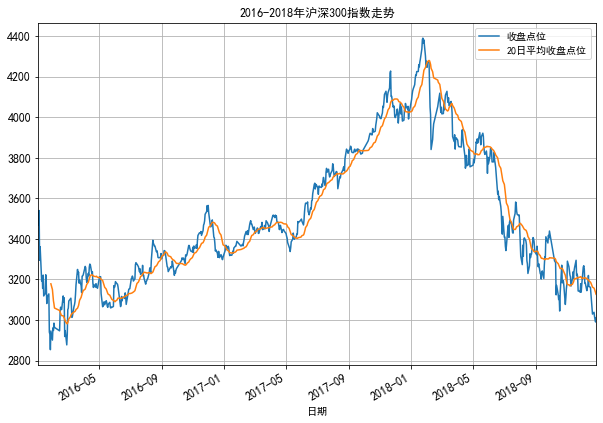

In [21]:
HS300_meanclose = HS300_new['收盘点位'].rolling(window=20).mean() # pandas.core.series.Series
# HS300_meanclose.head(20)
type(HS300_meanclose)
HS300_meanclose = HS300_meanclose.to_frame()
HS300_meanclose
HS300_meanclose = HS300_meanclose.rename(columns={'收盘点位':'20日平均收盘点位'})
HS300_meanclose.head()
HS300_close = HS300_new['收盘点位'].to_frame()
HS300_close.head()
HS300_new1 = pd.concat([HS300_close,HS300_meanclose],axis=1)
HS300_new1.head()
HS300_new1.plot(figsize=(10,7),title=r"2016-2018年沪深300指数走势",grid=True,fontsize=12)

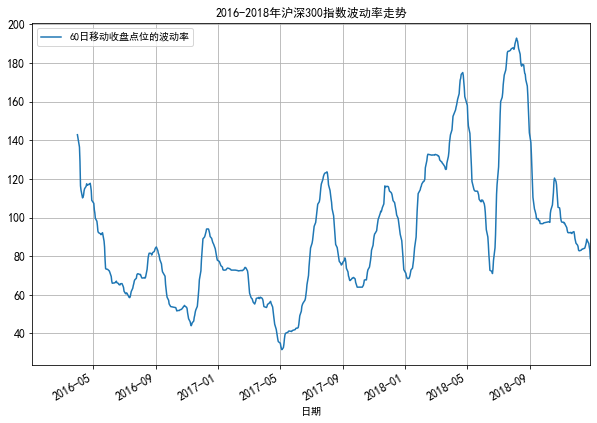

In [22]:
HS300_rollingstd = HS300_new['收盘点位'].rolling(window=60).std()
HS300_rollingstd = HS300_rollingstd.to_frame()
HS300_rollingstd = HS300_rollingstd.rename(columns={"收盘点位":"60日移动收盘点位的波动率"})
HS300_rollingstd.plot(figsize=(10,7),title=r"2016-2018年沪深300指数波动率走势",grid=True,fontsize=12)

In [23]:
HS300_rollingcoor = HS300_new.rolling(window=30).corr()
HS300_rollingcoor = HS300_rollingcoor.dropna()
HS300_rollingcoor.head(30)
HS300_rollingcoor.tail()

开盘点位      最高点位      最低点位      收盘点位
日期                                                     
2016-02-19 开盘点位  1.000000  0.980264  0.955704  0.903957
           最高点位  0.980264  1.000000  0.971737  0.953592
           最低点位  0.955704  0.971737  1.000000  0.972716
           收盘点位  0.903957  0.953592  0.972716  1.000000
2016-02-22 开盘点位  1.000000  0.973813  0.952086  0.900403
           最高点位  0.973813  1.000000  0.967829  0.955815
           最低点位  0.952086  0.967829  1.000000  0.969874
           收盘点位  0.900403  0.955815  0.969874  1.000000
2016-02-23 开盘点位  1.000000  0.974454  0.949938  0.894477
           最高点位  0.974454  1.000000  0.961305  0.947445
           最低点位  0.949938  0.961305  1.000000  0.964913
           收盘点位  0.894477  0.947445  0.964913  1.000000
2016-02-24 开盘点位  1.000000  0.968321  0.942697  0.869496
           最高点位  0.968321  1.000000  0.951542  0.933413
           最低点位  0.942697  0.951542  1.000000  0.949104
           收盘点位  0.869496  0.933413  0.949104  1.000000
2016-02-25 开盘点位  1.000000  0.957482  0.909353  0.826682
           最高点位  0.957482  1.000000  0.928872  0.911247
           最低点位  0.909353  0.928872  1.000000  0.945614
           收盘点位  0.826682  0.911247  0.945614  1.000000
2016-02-26 开盘点位  1.000000  0.948161  0.900014  0.788015
           最高点位  0.948161  1.000000  0.924075  0.890325
           最低点位  0.900014  0.924075  1.000000  0.944156
           收盘点位  0.788015  0.890325  0.944156  1.000000
2016-02-29 开盘点位  1.000000  0.938522  0.887463  0.783372
           最高点位  0.938522  1.000000  0.921799  0.899309
           最低点位  0.887463  0.921799  1.000000  0.946922
           收盘点位  0.783372  0.899309  0.946922  1.000000
2016-03-01 开盘点位  1.000000  0.935748  0.882522  0.769860
           最高点位  0.935748  1.000000  0.918993  0.893775

开盘点位      最高点位      最低点位      收盘点位
日期                                                     
2018-12-27 收盘点位  0.924463  0.968102  0.978729  1.000000
2018-12-28 开盘点位  1.000000  0.982534  0.972595  0.928031
           最高点位  0.982534  1.000000  0.984309  0.969076
           最低点位  0.972595  0.984309  1.000000  0.979887
           收盘点位  0.928031  0.969076  0.979887  1.000000

# 结合金融场景演示matplotlib模块的操作

## 曲线图

### 单一曲线图

In [24]:
beta = np.linspace(0.5, 2.0, 100)
Rf = 0.03
Rm = 0.12
Ri = Rf + beta * (Rm - Rf)

<Figure size 648x432 with 0 Axes>

(0.425, 2.075, 0.06824999999999999, 0.21675)

(array([0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2]),
 <a list of 10 Text xticklabel objects>)

Text(0.5, 0, '贝塔值')

(0.4, 2.1)

(array([0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22]),
 <a list of 9 Text yticklabel objects>)

Text(0, 0.5, '单一股票收益率')

(0.07, 0.22)

Text(0.5, 1.0, '资本资产定价模型')

Text(0.8, 0.15, '贝塔等于1的收益')

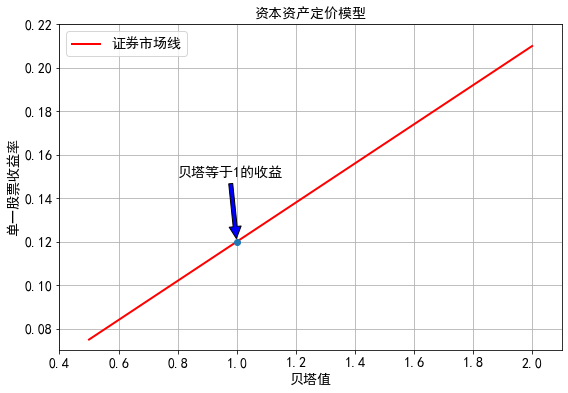

In [25]:

plt.figure(figsize=(9, 6))
plt.plot(beta, Ri, 'r-', label=u"证券市场线", lw=2.0)
plt.plot(1.0, Rf + 1.0 * (Rm - Rf), 'o', lw=2.5)
plt.axis('tight')
plt.xticks(fontsize=14)
plt.xlabel(u'贝塔值', fontsize=14)
plt.xlim(0.4, 2.1)
plt.yticks(fontsize=14)
plt.ylabel(u'单一股票收益率', fontsize=14, rotation=90)
plt.ylim(0.07, 0.22)
plt.title(u'资本资产定价模型', fontsize=14)
plt.annotate(u'贝塔等于1的收益',
             fontsize=14,
             xy=(1.0, 0.12),
             xytext=(0.8, 0.15),
             arrowprops=dict(facecolor='b', shrink=0.05))
plt.legend(loc=0,fontsize=14)
plt.grid()

### 多图绘制

In [26]:
HS300_new = pd.read_excel(r".\datas\第五章\沪深300指数（2016-2018）.xlsx",sheet_name="Sheet1",header=0,index_col=0)
HS300_new.head()

,开盘点位,最高点位,最低点位,收盘点位
日期,,,,
2016-01-04,3725.8561,3726.2446,3468.9485,3469.0662
2016-01-05,3382.1769,3518.2170,3377.2799,3478.7797
2016-01-06,3482.4064,3543.7394,3468.4666,3539.8082
2016-01-07,3481.1499,3481.1499,3284.7374,3294.3839
2016-01-08,3371.8710,3418.8508,3237.9307,3361.5632


<Figure size 792x648 with 0 Axes>

(array([735964., 736085., 736208., 736330., 736450., 736573., 736695.,
        736815., 736938., 737060.]), <a list of 10 Text xticklabel objects>)

Text(0.5, 0, '日期')

(array([2600., 2800., 3000., 3200., 3400., 3600., 3800., 4000., 4200.,
        4400., 4600.]), <a list of 11 Text yticklabel objects>)

Text(0, 0.5, '点位')

(array([735964., 736085., 736208., 736330., 736450., 736573., 736695.,
        736815., 736938., 737060.]), <a list of 10 Text xticklabel objects>)

Text(0.5, 0, '日期')

(array([2800., 3000., 3200., 3400., 3600., 3800., 4000., 4200., 4400.,
        4600.]), <a list of 10 Text yticklabel objects>)

Text(0, 0.5, '点位')

(array([735964., 736085., 736208., 736330., 736450., 736573., 736695.,
        736815., 736938., 737060.]), <a list of 10 Text xticklabel objects>)

Text(0.5, 0, '日期')

(array([2600., 2800., 3000., 3200., 3400., 3600., 3800., 4000., 4200.,
        4400., 4600.]), <a list of 11 Text yticklabel objects>)

Text(0, 0.5, '点位')

(array([735964., 736085., 736208., 736330., 736450., 736573., 736695.,
        736815., 736938., 737060.]), <a list of 10 Text xticklabel objects>)

Text(0.5, 0, '日期')

(array([2600., 2800., 3000., 3200., 3400., 3600., 3800., 4000., 4200.,
        4400., 4600.]), <a list of 11 Text yticklabel objects>)

Text(0, 0.5, '点位')

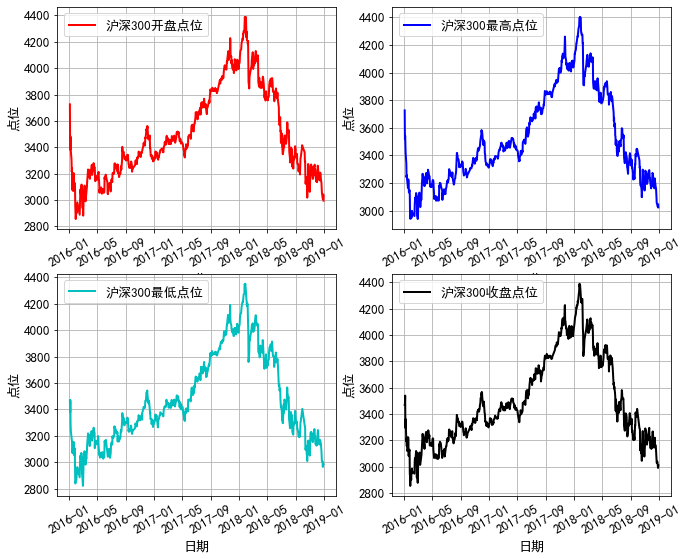

In [27]:
plt.figure(figsize=(11, 9))
plt.subplot(2,2,1)
plt.plot(HS300_new['开盘点位'], 'r-', label=u"沪深300开盘点位", lw=2.0)
plt.xticks(fontsize=13,rotation=30)
plt.xlabel(u'日期', fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel(u'点位', fontsize=13)
plt.legend(loc=0,fontsize=13)
plt.grid()
plt.subplot(2,2,2)
plt.plot(HS300_new['最高点位'], 'b-', label=u"沪深300最高点位", lw=2.0)
plt.xticks(fontsize=13,rotation=30)
plt.xlabel(u'日期', fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel(u'点位', fontsize=13)
plt.legend(loc=0,fontsize=13)
plt.grid()
plt.subplot(2,2,3)
plt.plot(HS300_new['最低点位'], 'c-', label=u"沪深300最低点位", lw=2.0)
plt.xticks(fontsize=13,rotation=30)
plt.xlabel(u'日期', fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel(u'点位', fontsize=13)
plt.legend(loc=0,fontsize=13)
plt.grid()
plt.subplot(2,2,4)
plt.plot(HS300_new['收盘点位'], 'k-', label=u"沪深300收盘点位", lw=2.0)
plt.xticks(fontsize=13,rotation=30)
plt.xlabel(u'日期', fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel(u'点位', fontsize=13)
plt.legend(loc=0,fontsize=13)
plt.grid()


## 直方图

### 单一样本的直方图

In [28]:
I=1000
x_norm = np.random.normal(loc=10.8,scale=1.5,size=I)
x_logn=np.random.lognormal(mean=0.5,sigma=1.0,size=I)
x_chi=np.random.chisquare(df=4,size=I)
x_beta = np.random.beta(a=2,b=4,size=I)

<Figure size 864x720 with 0 Axes>

(array([  3.,   2.,  12.,  34.,  39.,  65., 104., 101., 125., 127., 124.,
         94.,  63.,  51.,  26.,  17.,   8.,   3.,   1.,   1.]),
 array([ 6.40339109,  6.88461058,  7.36583007,  7.84704957,  8.32826906,
         8.80948856,  9.29070805,  9.77192755, 10.25314704, 10.73436654,
        11.21558603, 11.69680552, 12.17802502, 12.65924451, 13.14046401,
        13.6216835 , 14.102903  , 14.58412249, 15.06534198, 15.54656148,
        16.02778097]),
 <a list of 20 Patch objects>)

(array([ 4.,  6.,  8., 10., 12., 14., 16., 18.]),
 <a list of 8 Text xticklabel objects>)

Text(0.5, 0, '样本值')

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 8 Text yticklabel objects>)

Text(0, 0.5, '频数')

(array([595., 227.,  89.,  39.,  22.,  11.,   1.,   4.,   4.,   1.,   1.,
          1.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,   2.]),
 array([ 0.04965271,  2.11459443,  4.17953616,  6.24447788,  8.30941961,
        10.37436133, 12.43930306, 14.50424478, 16.56918651, 18.63412823,
        20.69906996, 22.76401168, 24.82895341, 26.89389513, 28.95883686,
        31.02377858, 33.08872031, 35.15366203, 37.21860375, 39.28354548,
        41.3484872 ]),
 <a list of 20 Patch objects>)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 <a list of 7 Text xticklabel objects>)

Text(0.5, 0, '样本值')

(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 <a list of 8 Text yticklabel objects>)

Text(0, 0.5, '频数')

(array([106., 159., 159., 138., 119.,  93.,  65.,  46.,  34.,  24.,  20.,
         12.,  12.,   4.,   2.,   5.,   0.,   0.,   1.,   1.]),
 array([ 0.10312059,  1.04010906,  1.97709754,  2.91408601,  3.85107448,
         4.78806296,  5.72505143,  6.66203991,  7.59902838,  8.53601685,
         9.47300533, 10.4099938 , 11.34698228, 12.28397075, 13.22095922,
        14.1579477 , 15.09493617, 16.03192465, 16.96891312, 17.9059016 ,
        18.84289007]),
 <a list of 20 Patch objects>)

(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 <a list of 10 Text xticklabel objects>)

Text(0.5, 0, '样本值')

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 <a list of 10 Text yticklabel objects>)

Text(0, 0.5, '频数')

(array([ 23.,  52.,  80.,  93.,  70., 103.,  74.,  77.,  75.,  74.,  65.,
         47.,  42.,  42.,  31.,  20.,  19.,   7.,   4.,   2.]),
 array([0.00120812, 0.04489221, 0.08857629, 0.13226037, 0.17594446,
        0.21962854, 0.26331262, 0.30699671, 0.35068079, 0.39436487,
        0.43804896, 0.48173304, 0.52541712, 0.56910121, 0.61278529,
        0.65646937, 0.70015346, 0.74383754, 0.78752162, 0.83120571,
        0.87488979]),
 <a list of 20 Patch objects>)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 7 Text xticklabel objects>)

Text(0.5, 0, '样本值')

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text yticklabel objects>)

Text(0, 0.5, '频数')

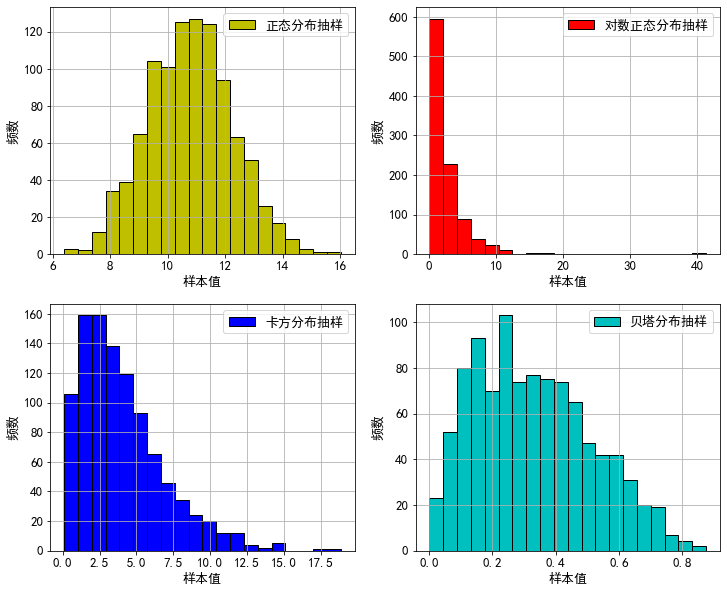

In [29]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.hist(x_norm,label=u'正态分布抽样',bins=20, facecolor='y',edgecolor='k')
plt.xticks(fontsize=13)
plt.xlabel(u'样本值',fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel(u'频数',fontsize=13)
plt.legend(loc=0,fontsize=13)
plt.grid(True)

plt.subplot(2,2,2)
plt.hist(x_logn,label=u'对数正态分布抽样',bins=20, facecolor='r',edgecolor='k')
plt.xticks(fontsize=13)
plt.xlabel(u'样本值',fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel(u'频数',fontsize=13)
plt.legend(loc=0,fontsize=13)
plt.grid(True)

plt.subplot(2,2,3)
plt.hist(x_chi,label=u'卡方分布抽样',bins=20, facecolor='b',edgecolor='k')
plt.xticks(fontsize=13)
plt.xlabel(u'样本值',fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel(u'频数',fontsize=13)
plt.legend(loc=0,fontsize=13)
plt.grid(True)

plt.subplot(2,2,4)
plt.hist(x_beta,label=u'贝塔分布抽样',bins=20, facecolor='c',edgecolor='k')
plt.xticks(fontsize=13)
plt.xlabel(u'样本值',fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel(u'频数',fontsize=13)
plt.legend(loc=0,fontsize=13)
plt.grid(True)

### 多个样本的直方图

array([[13.38838383, 10.34667624],
       [11.15666391, 11.00422222],
       [11.66398237,  9.57780407],
       ...,
       [11.10903947,  9.7373428 ],
       [10.41446929,  9.80984953],
       [10.26268532, 11.81588278]])

<Figure size 576x360 with 0 Axes>

([array([ 1.,  2.,  2.,  2.,  4., 13., 13., 23., 41., 59., 71., 90., 92.,
         86., 93., 96., 79., 75., 40., 36., 33., 18., 15., 10.,  4.,  0.,
          0.,  1.,  0.,  1.]),
  array([  1.,   3.,   6.,   8.,  13.,  26.,  35.,  48.,  81., 108., 149.,
         185., 188., 188., 182., 181., 157., 136.,  91.,  74.,  53.,  36.,
          21.,  16.,  11.,   1.,   0.,   1.,   0.,   1.])],
 array([ 5.76646904,  6.12770901,  6.48894899,  6.85018897,  7.21142894,
         7.57266892,  7.9339089 ,  8.29514888,  8.65638885,  9.01762883,
         9.37886881,  9.74010878, 10.10134876, 10.46258874, 10.82382871,
        11.18506869, 11.54630867, 11.90754864, 12.26878862, 12.6300286 ,
        12.99126858, 13.35250855, 13.71374853, 14.07498851, 14.43622848,
        14.79746846, 15.15870844, 15.51994841, 15.88118839, 16.24242837,
        16.60366834]),
 <a list of 2 Lists of Patches objects>)

(array([ 4.,  6.,  8., 10., 12., 14., 16., 18.]),
 <a list of 8 Text xticklabel objects>)

Text(0.5, 0, '样本值')

(array([  0.,  50., 100., 150., 200.]), <a list of 5 Text yticklabel objects>)

Text(0, 0.5, '频数')

Text(0.5, 1.0, '正态分布随机抽取的两组样本堆叠的直方图')

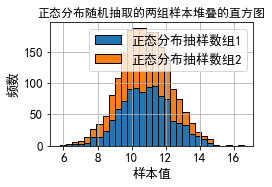

In [30]:
I = 1000
x_norm = np.random.normal(loc=10.8, scale=1.5, size=(I, 2))
x_norm
plt.figure(figsize=(8, 5))
plt.subplot(2, 2, 1)
plt.hist(x_norm,
         label=[u'正态分布抽样数组1', u'正态分布抽样数组2'],
         bins=30,
         stacked=True,
         edgecolor='k')
plt.xticks(fontsize=13)
plt.xlabel(u'样本值', fontsize=13)
plt.yticks(fontsize=13,rotation=0)
plt.ylabel(u'频数', fontsize=13)
plt.title(u'正态分布随机抽取的两组样本堆叠的直方图')
plt.legend(loc=0, fontsize=13)
plt.grid(True)

array([[12.28751813, 10.76435159],
       [13.30398615, 11.88773855],
       [12.29483749,  9.71950707],
       ...,
       [11.32325701, 11.64688414],
       [11.00495437, 11.66224537],
       [10.01148391, 10.10278372]])

<Figure size 576x360 with 0 Axes>

([array([ 1.,  2.,  2.,  6., 11., 14., 17., 26., 34., 42., 61., 80., 84.,
         99., 83., 79., 75., 70., 63., 52., 27., 30., 20.,  8.,  6.,  3.,
          1.,  1.,  1.,  2.]),
  array([ 2.,  1.,  4., 10., 12., 16., 13., 34., 42., 52., 64., 58., 80.,
         75., 89., 92., 68., 71., 50., 43., 50., 29., 19., 10.,  9.,  4.,
          2.,  1.,  0.,  0.])],
 array([ 6.06372029,  6.39502984,  6.72633939,  7.05764894,  7.3889585 ,
         7.72026805,  8.0515776 ,  8.38288715,  8.71419671,  9.04550626,
         9.37681581,  9.70812536, 10.03943492, 10.37074447, 10.70205402,
        11.03336357, 11.36467312, 11.69598268, 12.02729223, 12.35860178,
        12.68991133, 13.02122089, 13.35253044, 13.68383999, 14.01514954,
        14.3464591 , 14.67776865, 15.0090782 , 15.34038775, 15.6716973 ,
        16.00300686]),
 <a list of 2 Lists of Patches objects>)

(array([ 4.,  6.,  8., 10., 12., 14., 16., 18.]),
 <a list of 8 Text xticklabel objects>)

Text(0.5, 0, '样本值')

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text yticklabel objects>)

Text(0, 0.5, '频数')

Text(0.5, 1.0, '正态分布随机抽取的两组样本堆叠的直方图')

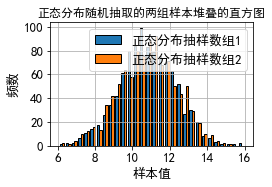

In [31]:
I = 1000
x_norm = np.random.normal(loc=10.8, scale=1.5, size=(I, 2))
x_norm
plt.figure(figsize=(8, 5))
plt.subplot(2, 2, 1)
plt.hist(x_norm,
         label=[u'正态分布抽样数组1', u'正态分布抽样数组2'],
         bins=30,
         stacked=False,
         edgecolor='k')
plt.xticks(fontsize=13)
plt.xlabel(u'样本值', fontsize=13)
plt.yticks(fontsize=13,rotation=0)
plt.ylabel(u'频数', fontsize=13)
plt.title(u'正态分布随机抽取的两组样本堆叠的直方图')
plt.legend(loc=0, fontsize=13)
plt.grid(True)

## 条形图

### 垂直条形图

In [32]:
return_dataframe

,中国石油,工商银行,上汽集团,宝钢股份
2018-09-03,0.003731,-0.001838,-0.003087,-0.024112
2018-09-04,0.021066,0.001842,-0.000344,0.011704
2018-09-05,-0.004854,-0.016544,-0.333910,-0.029563
2018-09-06,0.006098,-0.003738,0.007123,-0.014570
2018-09-07,-0.006060,0.003752,0.004597,0.016129


### 水平条形图

<Figure size 864x720 with 0 Axes>

<BarContainer object of 4 artists>

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

(array([-0.03 , -0.025, -0.02 , -0.015, -0.01 , -0.005,  0.   ,  0.005,
         0.01 ]), <a list of 9 Text yticklabel objects>)

(-0.035, 0.025)

Text(0, 0.5, '涨跌幅')

<BarContainer object of 4 artists>

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

(array([-0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15, -0.1 , -0.05,  0.  ]),
 <a list of 9 Text yticklabel objects>)

(-0.035, 0.025)

Text(0, 0.5, '涨跌幅')

<BarContainer object of 4 artists>

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

(array([-0.02 , -0.015, -0.01 , -0.005,  0.   ,  0.005,  0.01 ]),
 <a list of 7 Text yticklabel objects>)

(-0.035, 0.025)

Text(0, 0.5, '涨跌幅')

<BarContainer object of 4 artists>

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

(array([-0.01 , -0.005,  0.   ,  0.005,  0.01 ,  0.015,  0.02 ]),
 <a list of 7 Text yticklabel objects>)

(-0.035, 0.025)

Text(0, 0.5, '涨跌幅')

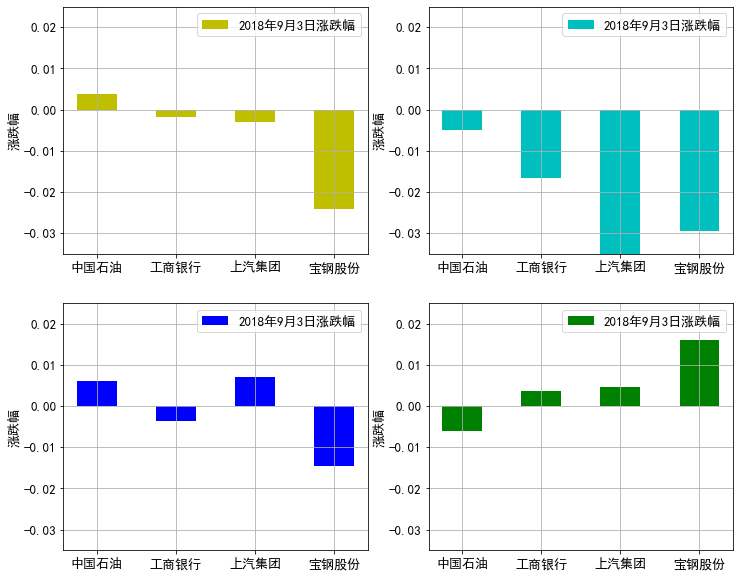

In [33]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.bar(x=return_dataframe.columns,
        height=return_dataframe.iloc[0],
        width=0.5,
        label=u'2018年9月3日涨跌幅',
        facecolor='y')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(-0.035, 0.025)
plt.ylabel(u'涨跌幅', fontsize=13, rotation=90)
plt.legend(loc=0, fontsize=13)
plt.grid(True)

plt.subplot(2, 2, 2)
plt.bar(x=return_dataframe.columns,
        height=return_dataframe.iloc[2],
        width=0.5,
        label=u'2018年9月3日涨跌幅',
        facecolor='c')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(-0.035, 0.025)
plt.ylabel(u'涨跌幅', fontsize=13, rotation=90)
plt.legend(loc=0, fontsize=13)
plt.grid(True)

plt.subplot(2, 2, 3)
plt.bar(x=return_dataframe.columns,
        height=return_dataframe.iloc[3],
        width=0.5,
        label=u'2018年9月3日涨跌幅',
        facecolor='b')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(-0.035, 0.025)
plt.ylabel(u'涨跌幅', fontsize=13, rotation=90)
plt.legend(loc=0, fontsize=13)
plt.grid(True)

plt.subplot(2, 2, 4)
plt.bar(x=return_dataframe.columns,
        height=return_dataframe.iloc[4],
        width=0.5,
        label=u'2018年9月3日涨跌幅',
        facecolor='g')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(-0.035, 0.025)
plt.ylabel(u'涨跌幅', fontsize=13, rotation=90)
plt.legend(loc=0, fontsize=13)
plt.grid(True)

<Figure size 648x432 with 0 Axes>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

(array([-0.02 , -0.015, -0.01 , -0.005,  0.   ,  0.005,  0.01 ,  0.015,
         0.02 ]), <a list of 9 Text xticklabel objects>)

([0, 1, 2, 3], <a list of 4 Text yticklabel objects>)

Text(0.5, 0, '涨跌幅')

Text(0.5, 1.0, '水平条形图可视化股票的涨跌幅')

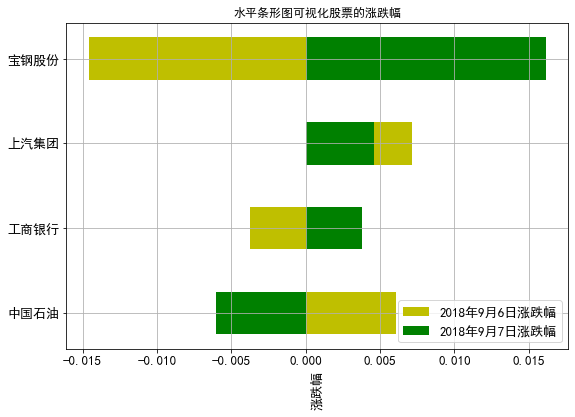

In [36]:
plt.figure(figsize=(9, 6))

plt.barh(y=return_dataframe.columns,
        width=return_dataframe.iloc[3],
        height=0.5,
        label=u'2018年9月6日涨跌幅',
        facecolor='y')
plt.barh(y=return_dataframe.columns,
        width=return_dataframe.iloc[4],
        height=0.5,
        label=u'2018年9月7日涨跌幅',
        facecolor='g')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.xlabel(u'涨跌幅', fontsize=13, rotation=90)
plt.title(u'水平条形图可视化股票的涨跌幅')
plt.legend(loc=0, fontsize=13)
plt.grid(True)

## 散点图

In [40]:
HS300_SZ180 = pd.read_excel(
    r"D:\PycharmProjects\mynotebook_02\datas\第五章\沪深300指数与上证180指数的日涨跌幅（2016-2018）.xlsx",
    sheet_name='Sheet1',
    header=0,
    index_col=0)
HS300_SZ180.head()
HS300_SZ180.tail()
HS300_SZ180.describe()
HS300_SZ180.corr()

,沪深300涨跌幅,上证180涨跌幅
日期,,
2016-01-04,-0.070206,-0.067217
2016-01-05,0.002800,0.004071
2016-01-06,0.017543,0.016765
2016-01-07,-0.069333,-0.066546
2016-01-08,0.020392,0.020349


,沪深300涨跌幅,上证180涨跌幅
日期,,
2018-12-24,0.002906,0.001876
2018-12-25,-0.006885,-0.007270
2018-12-26,-0.005054,-0.004896
2018-12-27,-0.003840,-0.002494
2018-12-28,0.006737,0.007389


,沪深300涨跌幅,上证180涨跌幅
count,731.000000,731.000000
mean,-0.000223,-0.000154
std,0.011826,0.011400
min,-0.070206,-0.067217
25%,-0.005144,-0.004876
50%,0.000350,0.000126
75%,0.005075,0.005022
max,0.043167,0.041031


,沪深300涨跌幅,上证180涨跌幅
沪深300涨跌幅,1.000000,0.985249
上证180涨跌幅,0.985249,1.000000


<Figure size 648x432 with 0 Axes>

(array([-0.1 , -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06]),
 <a list of 9 Text xticklabel objects>)

(array([-0.1 , -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06]),
 <a list of 9 Text yticklabel objects>)

Text(0.5, 0, '沪深300指数涨跌幅')

Text(0, 0.5, '上证180指数涨跌幅')

Text(0.5, 1.0, '沪深300指数与上证180指数的涨跌幅散点图')

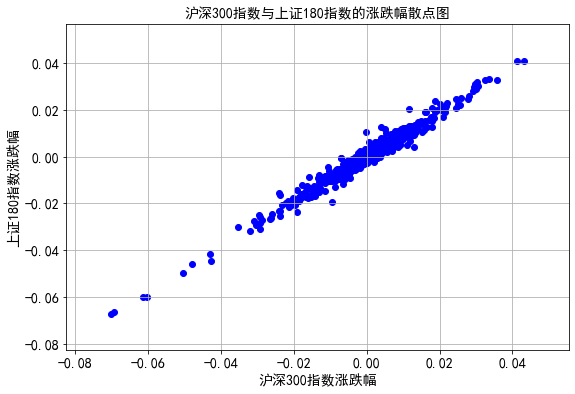

In [50]:
plt.figure(figsize=(9, 6))
plt.scatter(x=HS300_SZ180.iloc[:,0],y=HS300_SZ180.iloc[:,1],c='b',marker='o')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel(u'沪深300指数涨跌幅', fontsize=14)
plt.ylabel(u'上证180指数涨跌幅', fontsize=14, rotation=90)
plt.title(u'沪深300指数与上证180指数的涨跌幅散点图', fontsize=14)

plt.grid(True)

## 饼图

<Figure size 648x504 with 0 Axes>

([<matplotlib.patches.Wedge at 0x29c017e16c8>,
 [Text(0.2825863679242022, 1.0630827553221844, '美元'),
  Text(-0.9894968186709467, -0.48051643659720483, '欧元'),
  Text(0.21426035232560978, -1.0789311847478067, '人民币'),
  Text(0.7896983648961379, -0.7657522396182505, '日元'),
  Text(1.0646637383202557, -0.2765702881835609, '英镑')])

(-1.1051711028685707,
 1.1002462429937414,
 -1.1074581954933056,
 1.1245213116864508)

Text(0.5, 1.0, '特别提款权中不同币种的占比')

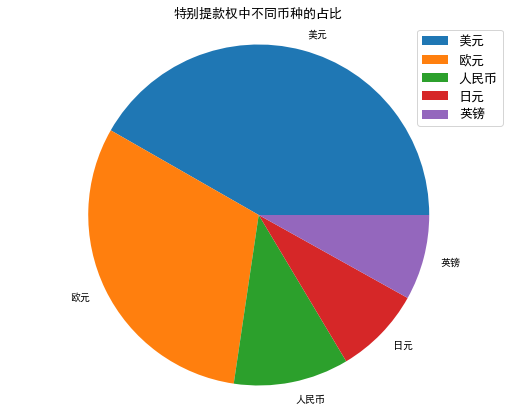

In [51]:
currency=['美元','欧元','人民币','日元','英镑']
perc = [0.4173,0.3093,0.1092,0.0833,0.0809]
plt.figure(figsize=(9,7))
plt.pie(x=perc,labels=currency)
plt.axis('equal')
plt.legend(loc=1,fontsize=13)
plt.title(u'特别提款权中不同币种的占比',fontsize=13)

# 结合金融场景演示scipy等模块的操作

## Scipy模块

### 求积分

### 插值法

In [3]:
from scipy import interpolate

array([0.25, 0.5 , 0.75, 1.  , 3.  , 5.  ])

array([0.25, 0.5 , 0.75, 1.  , 2.  , 3.  , 4.  , 5.  ])

array([0.27344, 0.27898, 0.28382, 0.2882 , 0.30414, 0.31746])

['nearest', 'zero', 'slinear', 'quadratic', 'cubic']

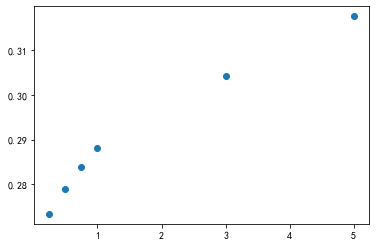

In [67]:
t = np.array([0.25, 0.5, 0.75, 1.0, 3.0, 5.0])
t_new = np.array([0.25, 0.5, 0.75, 1.0, 2.0, 3.0, 4.0, 5.0])
rates = np.array([0.27344, 0.27898, 0.28382, 0.2882, 0.30414, 0.31746])
types = ["nearest", "zero", "slinear", "quadratic", "cubic"]
t
t_new
rates
types
plt.plot(t,rates,'o')

<Figure size 576x432 with 0 Axes>

nearest [0.27344 0.27898 0.28382 0.2882  0.2882  0.30414 0.30414 0.31746]
zero [0.27344 0.27898 0.28382 0.2882  0.2882  0.30414 0.30414 0.31746]


slinear [0.27344 0.27898 0.28382 0.2882  0.29617 0.30414 0.3108  0.31746]
quadratic [0.27344    0.27898    0.28382    0.2882     0.29879098 0.30414
 0.31036301 0.31746   ]
cubic [0.27344    0.27898    0.28382    0.2882     0.29937206 0.30414
 0.30825294 0.31746   ]


(array([0., 1., 2., 3., 4., 5., 6.]), <a list of 7 Text xticklabel objects>)

(array([0.27, 0.28, 0.29, 0.3 , 0.31, 0.32]),
 <a list of 6 Text yticklabel objects>)

Text(0.5, 0, '期限')

Text(0, 0.5, '收益率')

Text(0.5, 1.0, '用插值法求2年期和4年期的远期国债到期收益率')

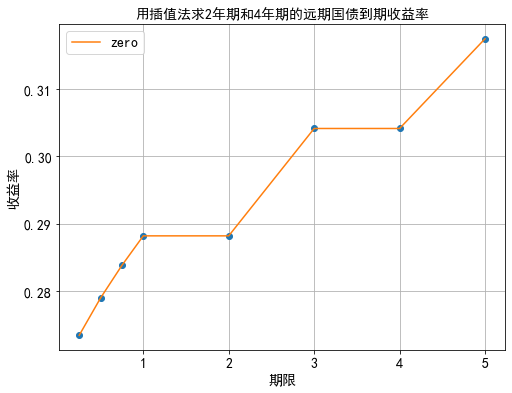

In [80]:
plt.figure(figsize=(8, 6))
# plt.plot(t,rates,'o')
for i in types:
    f= interpolate.interp1d(x=t,y=rates,kind=i)
    rates_new=f(t_new)
    print(i,rates_new)
    
#     plt.plot(t_new,rates_new,'o')
#     plt.plot(t_new,rates_new,'-',label=i)
    
    if i == 'zero':
        plt.plot(t_new,rates_new,'o')
        plt.plot(t_new,rates_new,'-',label=i)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel(u'期限', fontsize=14)
plt.ylabel(u'收益率', fontsize=14, rotation=90)

plt.legend(loc=0,fontsize=14)
plt.grid(True)
plt.title(u'用插值法求2年期和4年期的远期国债到期收益率', fontsize=14)

### 求解方程组

In [4]:
from scipy import linalg

In [11]:
stock_return = np.array([[0.003731, -0.001838, -0.003087, -0.024112],
                         [0.021066, 0.001842, -0.000344, 0.011704],
                         [-0.004854, -0.016544, -0.033391, -0.029563],
                         [0.006098, -0.003738, 0.007123, -0.01457]])
port_return = np.array([-0.0105654,0.0070534,-0.0256367,-0.0038289])

In [12]:
weight = linalg.solve(a=stock_return,b=port_return)
weight

array([0.1, 0.2, 0.3, 0.4])

In [14]:
from scipy import optimize

In [18]:
def g(w):
    w1, w2, w3, w4 = w
    eq1 = 0.003731 * w1 - 0.001838 * w2 - 0.003087 * w3 - 0.024112 * w4 + 0.0105654
    eq2 = 0.021066 * w1 + 0.001842 * w2 - 0.000344 * w3 + 0.011704 * w4 - 0.0070534
    eq3 = -0.004854 * w1 - 0.016544 * w2 - 0.033391 * w3 - 0.029563 * w4 + 0.0256367
    eq4 = 0.006098 * w1 - 0.003738 * w2 + 0.007123 * w3 - 0.01457 * w4 + 0.0038289
    return [eq1, eq2, eq3, eq4]

optimize.fsolve(g, [0.1, 0.1, 0.1, 0.1])

array([0.1, 0.2, 0.3, 0.4])

### 最优化求解

In [19]:
P=np.array([590.01,5.29,26.67,6.50])
R=np.array([0.349032,0.155143,0.132796,0.055905])
b=np.array([1.64,1.41,1.21,1.06])
def f(w):
    w = np.array(w)
    return -np.sum(R*w)

In [20]:
cons = ({
    'type': 'eq',
    'fun': lambda w: np.sum(w) - 1
}, {
    'type': 'ineq',
    'fun': lambda w: 1.4 - np.sum(w * b)
})
bnds = ((0,1),(0,1),(0,1),(0,1))

In [22]:
result = optimize.minimize(f, [0.25, 0.25, 0.25, 0.25],
                           method='SLSQP',
                           bounds=bnds,
                           constraints=cons)
result

     fun: -0.22804894822767985
     jac: array([-0.349032, -0.155143, -0.132796, -0.055905])
 message: 'Optimization terminated successfully.'
    nfev: 24
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([5.11920517e-01, 2.22044605e-16, 2.87240675e-01, 2.00838808e-01])

In [24]:
result['x'].round(3)
-f(result['x']).round(3)

array([0.512, 0.   , 0.287, 0.201])

0.228

In [31]:
shares = 1e8*result['x']/P
shares = shares.round(0)
shares

array([  86765.,       0., 1077018., 3089828.])

In [32]:
cons_new = ({
    'type': 'eq',
    'fun': lambda w: np.sum(w) - 1
}, {
    'type': 'ineq',
    'fun': lambda w: 1.2 - np.sum(w * b)
})
result_new = optimize.minimize(f, [0.25, 0.25, 0.25, 0.25],
                           method='SLSQP',
                           bounds=bnds,
                           constraints=cons_new)
result_new['x'].round(3)
-f(result_new['x']).round(3)
shares_new = (1e8*result_new['x']/P).round(0)
shares_new

array([0.141, 0.   , 0.389, 0.47 ])

0.127

array([  23844.,       0., 1459924., 7230093.])

## StatsModels模块

In [3]:
import statsmodels
statsmodels.__version__

'0.10.1'

In [9]:
from statsmodels import api

In [6]:
ICBC_HS300 = pd.read_excel(r".\datas\第六章\工商银行与沪深300指数.xlsx",
                           sheet_name="Sheet1",
                           header=0,
                           index_col=0)
ICBC_HS300 = ICBC_HS300.dropna()
ICBC_HS300.head()
ICBC_HS300.tail()

,ICBC,HS300
date,,
2016-01-04 00:00:00,-0.028384,-0.070206
2016-01-05 00:00:00,0.004494,0.002800
2016-01-06 00:00:00,0.008949,0.017543
2016-01-07 00:00:00,-0.017738,-0.069333
2016-01-08 00:00:00,0.006772,0.020392


,ICBC,HS300
date,,
2018-12-24 00:00:00,0.005780,0.002906
2018-12-25 00:00:00,0.001916,-0.006885
2018-12-26 00:00:00,0.007648,-0.005054
2018-12-27 00:00:00,0.001898,-0.003840
2018-12-28 00:00:00,0.001894,0.006737


In [13]:
Y = ICBC_HS300.iloc[:,0]
X = ICBC_HS300.iloc[:,1]
X_addcons=api.add_constant(X)

D:\MySoft\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [16]:
model = api.OLS(endog=Y,exog=X_addcons)
result = model.fit()
result.summary()
result.params

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ICBC   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     281.2
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           1.29e-53
Time:                        12:11:13   Log-Likelihood:                 2302.7
No. Observations:                 731   AIC:                            -4601.
Df Residuals:                     729   BIC:                            -4592.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      1.521      0.129      -0.000       0.001
HS300          0.5449      0.032     16.768      0.000       0.481       0.609
==============================================================================
Omnibus:                       90.243   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              420.477
Skew:                           0.451   Prob(JB):                     4.95e-92
Kurtosis:                       6.604   Cond. No.                         84.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

const    0.000584
HS300    0.544855
dtype: float64

<Figure size 648x432 with 0 Axes>

(array([-0.1 , -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06]),
 <a list of 9 Text xticklabel objects>)

(array([-0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06,  0.08]),
 <a list of 9 Text yticklabel objects>)

Text(0.5, 0, '沪深300指数涨跌幅')

Text(0, 0.5, '工商银行股票涨跌幅')

Text(0.5, 1.0, '工商银行股票与沪深300指数的线性回归')

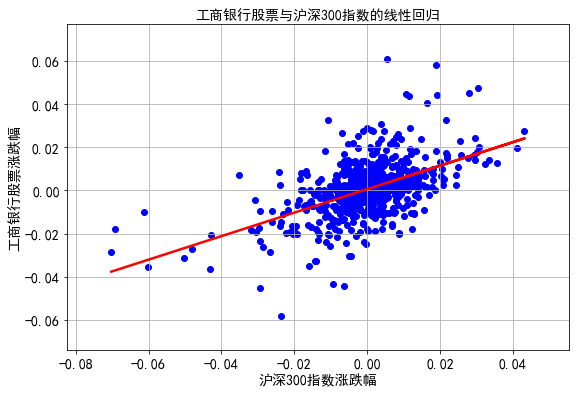

In [18]:
plt.figure(figsize=(9,6))
plt.scatter(X,Y,c='b',marker='o')
plt.plot(X,result.params[0]+result.params[1]*X,'r-',lw=2.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(u"沪深300指数涨跌幅",fontsize=14)
plt.ylabel(u"工商银行股票涨跌幅",fontsize=14,rotation=90)
plt.title(u"工商银行股票与沪深300指数的线性回归",fontsize=14)
plt.grid()



## 波动率模型与arc模块

In [3]:
import arch
arch.__version__

'4.13'

In [11]:
from arch import arch_model
HS300_SZ180 = pd.read_excel(
    r"D:\PycharmProjects\mynotebook_02\datas\第五章\沪深300指数与上证180指数的日涨跌幅（2016-2018）.xlsx",
    sheet_name='Sheet1',
    header=0,
    index_col=0)
model_arch = arch_model(y=HS300_SZ180.iloc[:, 0],
                        mean='Constant',
                        lags=0,
                        vol="ARCH",
                        p=1,
                        o=0,
                        q=0,
                        dist='normal')
model_garch = arch_model(y=HS300_SZ180.iloc[:, 0],
                         mean='Constant',
                         lags=0,
                         vol="GARCH",
                         p=1,
                         o=0,
                         q=1,
                         dist='normal')
HS300_SZ180.head()
HS300_SZ180.tail()

,沪深300涨跌幅,上证180涨跌幅
日期,,
2016-01-04,-0.070206,-0.067217
2016-01-05,0.002800,0.004071
2016-01-06,0.017543,0.016765
2016-01-07,-0.069333,-0.066546
2016-01-08,0.020392,0.020349


,沪深300涨跌幅,上证180涨跌幅
日期,,
2018-12-24,0.002906,0.001876
2018-12-25,-0.006885,-0.007270
2018-12-26,-0.005054,-0.004896
2018-12-27,-0.003840,-0.002494
2018-12-28,0.006737,0.007389


In [9]:
result_arch = model_arch.fit()
result_arch.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: -2231.7562144341227
Iteration:      2,   Func. Count:     17,   Neg. LLF: -2231.865941611332
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -2231.8659428139517
            Iterations: 3
            Function evaluations: 25
            Gradient evaluations: 2


D:\MySoft\Anaconda3\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001397. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:               沪深300涨跌幅   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                       ARCH   Log-Likelihood:                2231.87
Distribution:                  Normal   AIC:                          -4457.73
Method:            Maximum Likelihood   BIC:                          -4443.95
                                        No. Observations:                  731
Date:                Wed, Feb 19 2020   Df Residuals:                      728
Time:                        15:28:17   Df Model:                            3
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -4.0404e-04  4.553e-04     -0.887      0.375 [-1.296e-03,4.884e-04]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      9.7770e-05  1.150e-05      8.503  1.848e-17 [7.523e-05,1.203e-04]
alpha[1]       0.3000      0.119      2.525  1.157e-02   [6.713e-02,  0.533]
============================================================================

Covariance estimator: robust
"""

In [12]:
result_garch = model_garch.fit()
result_garch.summary()

D:\MySoft\Anaconda3\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001397. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


Iteration:      1,   Func. Count:      6,   Neg. LLF: -2337.3780970779944
Iteration:      2,   Func. Count:     21,   Neg. LLF: -2339.798333548434
Iteration:      3,   Func. Count:     36,   Neg. LLF: -2339.8026919020167
Iteration:      4,   Func. Count:     52,   Neg. LLF: -2339.8024509873344
Iteration:      5,   Func. Count:     65,   Neg. LLF: -2339.8027016165397
Iteration:      6,   Func. Count:     77,   Neg. LLF: -2339.802963409855
Iteration:      7,   Func. Count:     90,   Neg. LLF: -2339.803225370226
Iteration:      8,   Func. Count:    102,   Neg. LLF: -2339.803500321733
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -2339.8035016443528
            Iterations: 12
            Function evaluations: 102
            Gradient evaluations: 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:               沪深300涨跌幅   R-squared:                      -0.003
Mean Model:             Constant Mean   Adj. R-squared:                 -0.003
Vol Model:                      GARCH   Log-Likelihood:                2339.80
Distribution:                  Normal   AIC:                          -4671.61
Method:            Maximum Likelihood   BIC:                          -4653.23
                                        No. Observations:                  731
Date:                Wed, Feb 19 2020   Df Residuals:                      727
Time:                        15:28:58   Df Model:                            4
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         4.6872e-04  9.245e-05      5.070  3.984e-07 [2.875e-04,6.499e-04]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.7935e-06  1.812e-11  1.542e+05      0.000 [2.794e-06,2.794e-06]
alpha[1]       0.1000  3.724e-02      2.686  7.242e-03   [2.702e-02,  0.173]
beta[1]        0.8800  2.730e-02     32.236 5.607e-228     [  0.826,  0.933]
============================================================================

Covariance estimator: robust
"""

mu          0.000469
omega       0.000003
alpha[1]    0.099999
beta[1]     0.879991
Name: params, dtype: float64

D:\MySoft\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


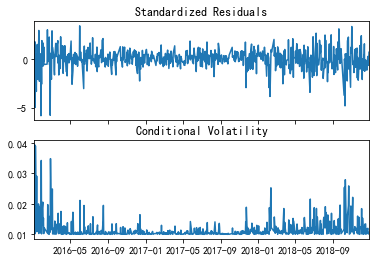

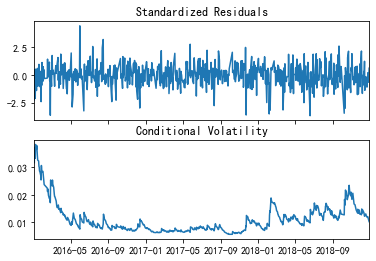

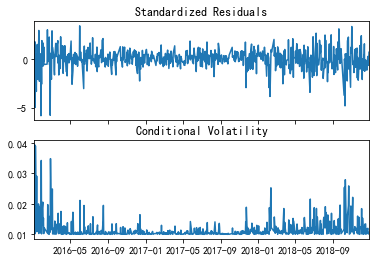

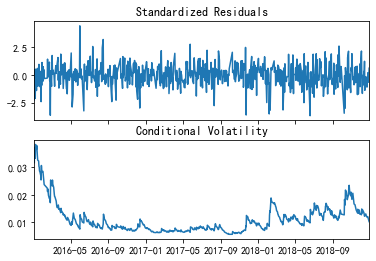

In [14]:
result_garch.params
result_arch.plot()
result_garch.plot()

## datetime

In [19]:
import datetime as dt

In [20]:
T1 = dt.datetime(2018, 12, 28)
T1

datetime.datetime(2018, 12, 28, 0, 0)

In [32]:
T2 = dt.datetime(2018, 8, 8, 14, 38, 58, 88)
T2

datetime.datetime(2018, 8, 8, 14, 38, 58, 88)

In [23]:
now = dt.datetime.now()
today = dt.datetime.today()
now
today

datetime.datetime(2020, 2, 19, 12, 24, 59, 573333)

datetime.datetime(2020, 2, 19, 12, 24, 59, 573334)

In [29]:
n1 = dt.datetime.now()
ni = 0
for i in range(10000000):
    ni+=i
n2 = dt.datetime.now()
n2 - n1

datetime.timedelta(seconds=1, microseconds=84076)

In [31]:
now.__gt__(today)
today.__gt__(now)

False

True

In [34]:
T_delta = T1-T2
T_delta
T_delta.days

datetime.timedelta(days=141, seconds=33661, microseconds=999912)

141

# 运用python分析利率与债券

## 利率体系

,贷款基础利率(LPR)
日期,
2013-10-25,0.0571
2013-10-28,0.0572
2013-10-29,0.0572
2013-10-30,0.0572
2013-10-31,0.0572


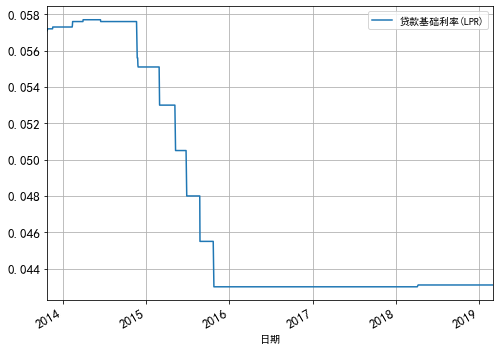

In [43]:
LPR = pd.read_excel(r"./datas/第七章/贷款基础利率（LPR）数据.xls",
                           sheet_name="Sheet1",
                           header=0,
                           index_col=0)
LPR = LPR.dropna(how="all")
LPR.head()
LPR.plot(figsize=(8,6),grid=True,fontsize=13)

,1天期银行间同业拆借利率,7天期银行间同业拆借利率,14天期银行间同业拆借利率,21天期银行间同业拆借利率,1个月期银行间同业拆借利率,2个月期银行间同业拆借利率,3个月期银行间同业拆借利率,4个月期银行间同业拆借利率,6个月期银行间同业拆借利率,9个月期银行间同业拆借利率,1年期银行间同业拆借利率
日期,,,,,,,,,,,
2018-12-25 00:00:00,0.020628,0.037489,0.042171,0.042116,0.042923,0.039686,0.043672,0.036500,0.042795,0.0475,0.041061
2018-12-26 00:00:00,0.020624,0.043762,0.044110,0.043083,0.040330,0.038717,0.042252,0.039833,0.036633,NaN,0.048000
2018-12-27 00:00:00,0.018514,0.041876,0.044080,0.046250,0.034940,0.040489,0.047916,0.044000,0.041744,NaN,0.047500
2018-12-28 00:00:00,0.016098,0.039596,0.041490,0.043408,0.032130,0.043918,0.047413,0.041000,0.038706,0.0530,0.045692
2018-12-29 00:00:00,0.023450,0.035033,0.036927,0.042231,0.038600,0.036375,0.040533,0.037000,NaN,0.0480,0.047500


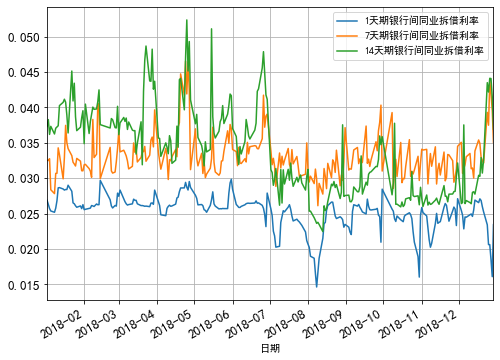

In [45]:
IBL = pd.read_excel(r"./datas/第七章/银行间同业拆借利率（2018年）.xls",
                           sheet_name="Sheet1",
                           header=0,
                           index_col=0)
IBL=IBL.dropna(how="all")
IBL.tail()
IBL.iloc[:,0:3].plot(figsize=(8,6),grid=True,fontsize=13)

,1天期回购定盘利率(FR001),7天期回购定盘利率(FR007),14天期回购定盘利率(FR014)
日期,,,
2018-12-25,0.0203,0.0256,0.042
2018-12-26,0.0204,0.0266,0.048
2018-12-27,0.0180,0.0354,0.065
2018-12-28,0.0146,0.0500,0.050
2018-12-29,0.0256,0.0296,0.037


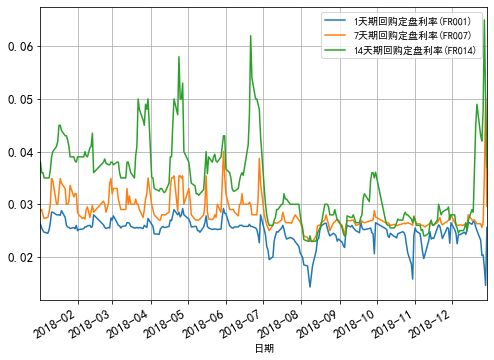

In [50]:
FR = pd.read_excel(r"./datas/第七章/银行间回购定盘利率（2018年）.xls",
                   sheet_name="Sheet1",
                   header=0,
                   index_col=0)
FR = FR.dropna(how="all")
FR.tail()
FR.plot(figsize=(8, 6), grid=True, fontsize=13)

,SHIBOR（O/N）,SHIBOR（1W）,SHIBOR（2W）,SHIBOR（1M）,SHIBOR（3M）,SHIBOR（6M）,SHIBOR（9M）,SHIBOR（1Y）
日期,,,,,,,,
2018-12-25,0.02028,0.02653,0.03130,0.03302,0.03273,0.03289,0.03480,0.03518
2018-12-26,0.02029,0.02672,0.03233,0.03397,0.03309,0.03291,0.03480,0.03520
2018-12-27,0.01793,0.02695,0.03322,0.03470,0.03339,0.03294,0.03480,0.03520
2018-12-28,0.01470,0.02721,0.03368,0.03492,0.03357,0.03297,0.03480,0.03521
2018-12-29,0.02554,0.02903,0.03399,0.03472,0.03346,0.03299,0.03477,0.03518


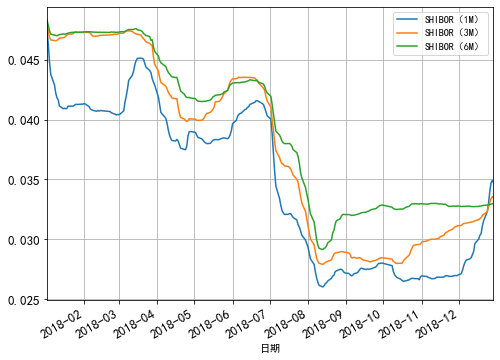

In [51]:
Shibor = pd.read_excel(r"./datas/第七章/Shibor利率（2018年）.xls",
                       sheet_name="Sheet1",
                       header=0,
                       index_col=0)
Shibor = Shibor.dropna(how="all")
Shibor.tail()
Shibor.iloc[:, 3:6].plot(figsize=(8, 6), grid=True, fontsize=13)

## 债券市场

,债券存量（万亿元）,国内生产总值（万亿元）
年份,,
2010,16.96,41.21193
2011,20.35,48.79402
2012,25.12,53.85800
2013,29.45,59.29632
2014,35.56,64.12806


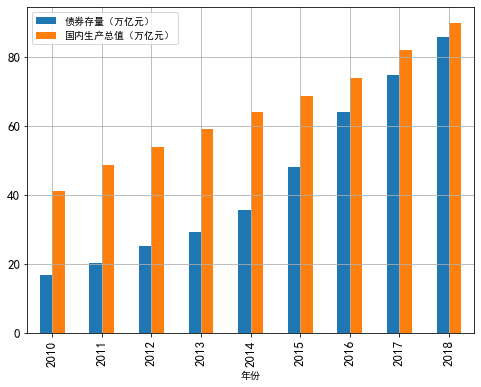

In [53]:
bond_GDP = pd.read_excel(r"./datas/第七章/债券存量规模与GDP（2010-2018年）.xlsx",
                       sheet_name="Sheet1",
                       header=0,
                       index_col=0)
bond_GDP = bond_GDP.dropna(how="all")
bond_GDP.head()
bond_GDP.plot(kind='bar',figsize=(8, 6), grid=True, fontsize=13)

,债券余额(亿元)
交易市场,
银行间市场,439925.497325
交易所市场,90094.549959
银行间和交易所市场,178020.300061
银行间和柜台市场,28581.480000
银行间、交易所和柜台市场,104232.500000


<Figure size 648x504 with 0 Axes>

([<matplotlib.patches.Wedge at 0x195577e1788>,
 [Text(-0.08006356909060364, 1.0970824148187202, '银行间市场'),
  Text(-0.9745187306203712, -0.5102090195890902, '交易所市场'),
  Text(-0.09531480999808417, -1.095862713570924, '银行间和交易所市场'),
  Text(0.6960638915608873, -0.8517599772618537, '银行间和柜台市场'),
  Text(1.0176369917646955, -0.41763016293378713, '银行间、交易所和柜台市场')])

(-1.1098282974922422,
 1.1004680141662972,
 -1.1167736959013284,
 1.1085008341601825)

Text(0.5, 1.0, '2018年国内债券在不同市场分布情况')

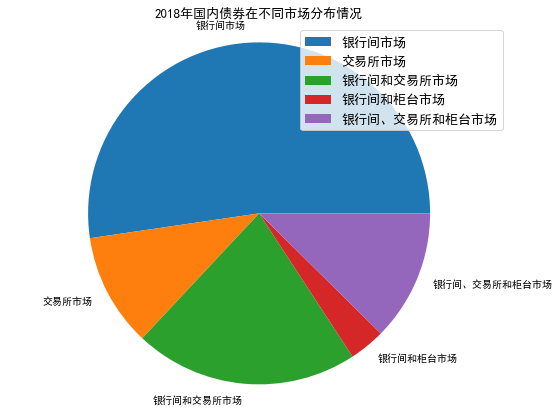

In [57]:
bond = pd.read_excel(r"./datas/第七章/国内债券市场按照交易场所分类（2018年末）.xlsx",
                     sheet_name="Sheet1",
                     header=0,
                     index_col=0)
bond = bond.dropna(how="all")
bond.head()
plt.figure(figsize=(9,7))
plt.pie(x=bond['债券余额(亿元)'],labels=bond.index)
plt.axis('equal')
plt.legend(loc=1,fontsize=13)
plt.title(u"2018年国内债券在不同市场分布情况",fontsize=13)

## 利率度量

In [58]:
r = 0.02
M = [1, 2, 4, 12, 52, 365]
name = ['一年复利1次', '每半年复利1次', '每季度复利1次', '每月复利1次', '每周复利1次', '每天复利1次']
value = []
i=0
for m in M:
    value.append(100*(1+r/m)**m)
    print(name[i],round(value[i],4))
    i += 1

一年复利1次 102.0
每半年复利1次 102.01
每季度复利1次 102.0151
每月复利1次 102.0184
每周复利1次 102.0197
每天复利1次 102.0201


In [71]:
def FV(A, n, R, m):
    '''
    构建一个用于计算不同复利频次的投资终值函数
    :param A: 表示初始的投资本金
    :param n: 表示投资期限（年）
    :param R: 表示年利率R是按年复利的利率
    :param m: 表示每年的复利频次，
        输入Y代表一年复利1次，
        S代表每半年复利1次，
        Q代表每季度复利1次，
        M代表每月复利1次，
        W代表每周复利1次，
        W代表每天复利1次
    :return: 
    '''
    
    m_dict={'Y':1,'S':2,'Q':4,'M':12,'W':52,'D':365}
    
    if m in m_dict.keys():
        return A * (1 + R/m_dict[m])**(n*m_dict[m])
    else:
        raise KeyError
#     if m == 'Y':
#         return A * (1 + R)**n
#     elif m == 'S':
#         return A * (1 + R/2)**(n*2)
#     elif m == 'Q':
#         return A * (1 + R/4)**(n*4)
#     elif m == 'M':
#         return A * (1 + R/12)**(n*12)
#     elif m == 'S':
#         return A * (1 + R/52)**(n*52)
#     elif m == 'D':
#         return A * (1 + R/365)**(n*365)

In [74]:
FV_M=FV(A=100,n=1,R=0.02,m="M")
# FV
round(FV_M,4)

102.0184

<Figure size 576x432 with 0 Axes>

Text(0.5, 0, '')

Text(0, 0.5, '')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 8 Text xticklabel objects>)

(array([101.9975, 102.    , 102.0025, 102.005 , 102.0075, 102.01  ,
        102.0125, 102.015 , 102.0175, 102.02  , 102.0225]),
 <a list of 11 Text yticklabel objects>)

Text(0.5, 1.0, '复利频次与投资终值的关系图')

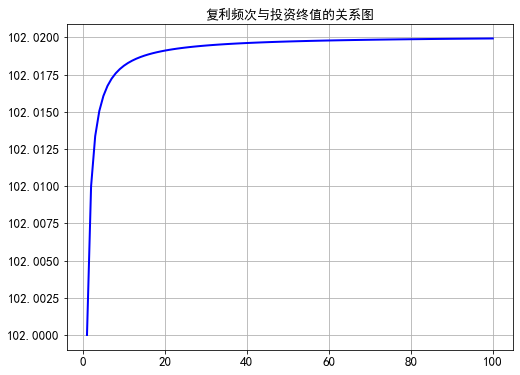

In [17]:
r=0.02
M=np.arange(1,101)
PV=100
FV=PV*(1+r/M)**M
plt.figure(figsize=(8,6))
plt.plot(M,FV,'b-',lw=2.0)
plt.xlabel(u'',fontsize=13)
plt.ylabel(u'',fontsize=13, rotation=90)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'复利频次与投资终值的关系图',fontsize=13)
plt.grid(True)


### 连续复利

In [21]:
def Rc(Rm, m):
    '''
    构建已知复利频次和对应的复利利率，计算等价连续复利利率的函数
    :param Rm: 代表了复利频次m的复利利率
    :param m: 代表了复利频次
    :return:
    '''
    return np.log(1 + Rm / m) * m


def Rm(Rc, m):
    '''
    构建已知复利频次和对应的连续复利利率，计算等价对应复利利率的函数
    :param Rc: 代表了连续复利利率
    :param m: 代表了复利频次
    :return:
    '''
    return (np.exp(Rc / m) - 1) * m

In [19]:
R_c = Rc(Rm=0.05,m=4)
round(R_c,6)

0.04969

In [22]:
R_m = Rm(Rc=0.06,m=12)
round(R_m,6)

0.06015

### 零利息率

In [23]:
A=100
r=0.04
T=3
FV=A*np.exp(r*T)
round(FV,4)

112.7497

## 债券定价与债券收益率

In [9]:
def Bond_price(C,M,T,m,y):
    '''
    构造计算债券价格的函数 
    :param C: 表示债券的票面利率
    :param M: 表示债券的本金
    :param T: 表示债券的期限，用年表示
    :param m: 表示债券票面利率每年的支付额次
    :param y: 表示贴现利率，也就是债券的到期收益率
    :return: 
    '''
    coupon=[]
    for i in range(1,T*m+1):
        coupon.append(np.exp(-y*i/m)*M*C/m)
    return np.sum(coupon)+np.exp(-y*T)*M

In [5]:
Bond = Bond_price(C=0.0525,M=100,T=10,m=2,y=0.042)
Bond

108.12527888522294

In [13]:
from scipy import optimize
def YTM(C,M,T,m,P):
    '''
    构建计算债券到期收益率（连续复利）的函数 
    :param C: 表示债券的票面利率
    :param M: 表示债券的本金
    :param T: 表示债券的期限，用年表示
    :param m: 表示债券票面利率每年的支付额次
    :param P: 债券的市场价格
    :return: 
    '''
    def f(y):
        coupon=[]
        for i in range(1,T*m+1):
            coupon.append(np.exp(-y*i/m)*M*C/m)
        return np.sum(coupon)+np.exp(-y*T)*M-P
    return optimize.fsolve(f, 0.1)

In [16]:
Bond_yield = YTM(C=0.05,M=100,T=5,m=2,P=98)
Bond_yield

array([0.05389247])

In [17]:
def Bond_value(c,t,y):
    '''
    构造基于不同期限零息利率作为贴现率计算债券价格函数
    :param c: 表示债券连续期内现金流，用数组的数据结构输入
    :param t: 表示对应于产生现金流的时刻或期限，用数组的数据结构输入
    :param y: 表示不同期限的年利息率，用数字的数据结构输入
    :return: 
    '''
    cashflow=[]
    for i in np.arange(len(c)):
        cashflow.append(c[i]*np.exp(-y[i]*t[i]))
    return np.sum(cashflow)
    

In [22]:
def f(R):
    R1, R2, R3, R4, R5 = R
    P1 = 99.42
    P2 = 98.83
    P3 = 100.09
    P4 = 101.32
    P5 = 99.39
    par = 100.0
    C3 = 0.0277
    C4 = 0.0346
    C5 = 0.0253
    bond1 = P1 * np.exp(R1 * 0.25) - par
    bond2 = P2 * np.exp(R2 * 0.5) - par
    bond3 = P3 * np.exp(R3 * 1.0) - par * (1 + C3)
    bond4 = par * (0.5 * C4 * np.exp(-R2 * 0.5) + 0.5 * C4 * np.exp(-R3) +
                   (1 + 0.5 * C4) * np.exp(-R4 * 1.5)) - P4
    bond5 = par * (0.5 * C5 * np.exp(-R2 * 0.5) + 0.5 * C5 * np.exp(-R3) +
                   0.5 * C5 * np.exp(-R4 * 1.5) + (1 + 0.5 * C5) * np.exp(
                       -R5 * 2)) - P5
    return np.array([bond1, bond2, bond3, bond4, bond5])

In [23]:
Zero_rates=optimize.fsolve(f,[0.1,0.1,0.1,0.1,0.1])
Zero_rates

array([0.02326754, 0.02353797, 0.0264237 , 0.02541116, 0.028313  ])

<Figure size 576x432 with 0 Axes>

(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25]),
 <a list of 10 Text xticklabel objects>)

(array([0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029]),
 <a list of 7 Text yticklabel objects>)

Text(0.5, 0, '期限（年）')

Text(0, 0.5, '利率')

Text(0.5, 1.0, '运用票系剥离法得到的零息曲线')

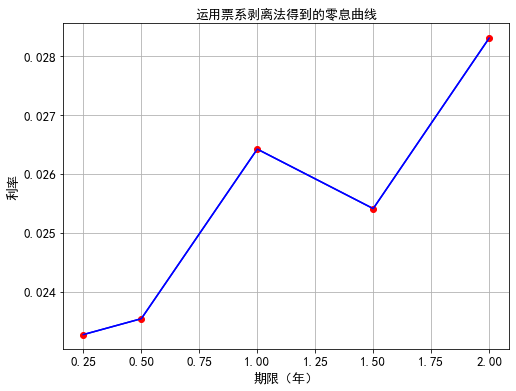

In [24]:
T=np.array([0.25,0.5,1.0,1.5,2.0])
plt.figure(figsize=(8,6))
plt.plot(T,Zero_rates,'b-')
plt.plot(T,Zero_rates,'ro')


plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.xlabel(u'期限（年）', fontsize=13)
plt.ylabel(u'利率', fontsize=13, rotation=90)
plt.title(u'运用票系剥离法得到的零息曲线', fontsize=13)

plt.grid(True)

<Figure size 576x432 with 0 Axes>

(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25]),
 <a list of 10 Text xticklabel objects>)

(array([0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029]),
 <a list of 7 Text yticklabel objects>)

Text(0.5, 0, '期限（年）')

Text(0, 0.5, '利率')

Text(0.5, 1.0, '基于差值法得到的零息曲线')

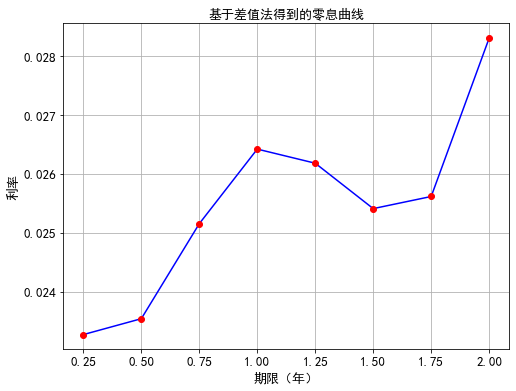

In [26]:
from scipy import interpolate
func=interpolate.interp1d(T,Zero_rates,kind='cubic')
T_new = np.array([0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0])
Zero_rates_new = func(T_new)

plt.figure(figsize=(8,6))
plt.plot(T_new,Zero_rates_new,'b-')
plt.plot(T_new,Zero_rates_new,'ro')


plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.xlabel(u'期限（年）', fontsize=13)
plt.ylabel(u'利率', fontsize=13, rotation=90)
plt.title(u'基于差值法得到的零息曲线', fontsize=13)

plt.grid(True)

### 运用零息利率对债券定价

In [27]:
coupon=0.06
m=4
par=100
bond_cashflow=np.ones_like(T_new)*par*coupon/m
bond_cashflow[-1]=par*(1+coupon/m)
bond_price = Bond_value(c=bond_cashflow,t=T_new,y=Zero_rates_new)
bond_price

106.14860200251223

## 远期利率与远期利率协议

### 远期利率

In [33]:
zero_rate = np.array([0.025, 0.028, 0.032, 0.037, 0.045])


def func(Rf):
    Rf2, Rf3, Rf4, Rf5 = Rf
    year2 = 100 * np.exp(zero_rate[1] * 2) - 100 * np.exp(
        zero_rate[0] * 1.0) * np.exp(Rf2 * 1.0)
    year3 = 100 * np.exp(zero_rate[2] * 3) - 100 * np.exp(
        zero_rate[1] * 2.0) * np.exp(Rf3 * 1.0)
    year4 = 100 * np.exp(zero_rate[3] * 4) - 100 * np.exp(
        zero_rate[2] * 3.0) * np.exp(Rf4 * 1.0)
    year5 = 100 * np.exp(zero_rate[4] * 5) - 100 * np.exp(
        zero_rate[3] * 4.0) * np.exp(Rf5 * 1.0)
    return np.array([year2, year3, year4, year5])

In [34]:
forward_rates = optimize.fsolve(func, [0.1, 0.1, 0.1, 0.1])
forward_rates

array([0.031, 0.04 , 0.052, 0.077])

数学表达式

In [35]:
def Rf(R1,R2,T1,T2):
    '''
    定义计算远期利率的函数
    :param R1: 表示对应期限为T1的零息利率
    :param R2: 表示对应期限为T2的零息利率
    :param T1: 表示对应于零息利率R1的期限长度
    :param T2: 表示对应于零息利率R2的期限长度
    :return: 
    '''
    return R2+(R2-R1)*T1/(T2-T1) # 计算远期利率的表达式
    

In [36]:
T_list = np.arange(1,6)
Rf_result = Rf(R1=zero_rate[0:4],R2=zero_rate[1:],T1=T_list[0:4],T2=T_list[1:])
Rf_result

array([0.031, 0.04 , 0.052, 0.077])

# 运用python分析股票投资

# 运用python分析期货套期保值

# 运用python分析期权的定价与风险

# 运用python分析期权交易策略

# 运用python测度风险价值